In [2]:
# https://www.kaggle.com/code/gcdatkin/mobile-payment-fraud-detection/notebook#Data-Every-Day
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Project Fraud/PS.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
{column: len(data[column].unique()) for column in data.columns}

{'step': 743,
 'type': 5,
 'amount': 5316900,
 'nameOrig': 6353307,
 'oldbalanceOrg': 1845844,
 'newbalanceOrig': 2682586,
 'nameDest': 2722362,
 'oldbalanceDest': 3614697,
 'newbalanceDest': 3555499,
 'isFraud': 2,
 'isFlaggedFraud': 2}

In [7]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Type Feature One Hot Encoding

In [9]:
pd.get_dummies(data['type'], prefix='tp')

,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [10]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [12]:
# One-hot encode the type column
df = onehot_encode(data, column='type', prefix='tp')
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [13]:

# Drop step, nameOrig, and isFlaggedFraud columns
df = df.drop(['step', 'nameOrig','isFlaggedFraud'], axis=1)
df


,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


In [14]:
y = df['isFraud'].copy()
X = df.drop('isFraud', axis=1).copy()

In [15]:
X

,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,C553264065,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,C38997010,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,C776919290,0.00,339682.13,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,0,1,0,0,0
6362618,850002.52,850002.52,0.00,C2080388513,0.00,0.00,0,0,0,0,1


In [16]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)


In [18]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
4878474,5016.60,0.00,0.00,M140865561,0.00,0.00,0,0,0,1,0
3860469,42841.81,10542346.19,10585188.01,C27112733,85614.16,42772.34,1,0,0,0,0
1875100,110518.93,17048.00,0.00,C1558878451,906379.01,1016897.94,0,1,0,0,0
2452949,266447.57,15069.00,281516.57,C850090252,0.00,0.00,1,0,0,0,0
5530032,164845.76,246610.00,81764.24,C1572035733,410448.30,575294.06,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1241052,26530.47,14520.00,0.00,M952866019,0.00,0.00,0,0,0,1,0
3163458,35523.66,3072513.69,3108037.35,C863770628,6089145.94,6053622.28,1,0,0,0,0
4222334,68582.82,0.00,0.00,C1572482192,3875124.56,3943707.38,0,1,0,0,0
277869,135264.84,30857.00,0.00,C962672658,0.00,204222.40,0,1,0,0,0


In [19]:
# Create a tokenizer and fit it to the customer data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train['nameDest'])

print("Total # of customers:", len(tokenizer.word_index))


Total # of customers: 2034516


In [20]:
# Create tokenized customer lists
customers_train = tokenizer.texts_to_sequences(X_train['nameDest'])
customers_test = tokenizer.texts_to_sequences(X_test['nameDest'])


In [21]:
customers_train

[[402536],
 [179952],
 [50697],
 [151428],
 [215460],
 [79810],
 [93168],
 [402537],
 [20695],
 [402538],
 [128314],
 [215461],
 [68427],
 [402539],
 [402540],
 [50698],
 [179953],
 [151429],
 [260634],
 [93169],
 [402541],
 [402542],
 [402543],
 [402544],
 [402545],
 [402546],
 [37541],
 [260635],
 [151430],
 [1814],
 [13080],
 [260636],
 [179954],
 [319903],
 [402547],
 [8121],
 [402548],
 [402549],
 [215462],
 [402550],
 [402551],
 [215463],
 [50699],
 [9583],
 [179955],
 [37542],
 [402552],
 [402553],
 [20696],
 [319904],
 [27786],
 [128315],
 [128316],
 [37543],
 [151431],
 [43594],
 [402554],
 [402555],
 [79811],
 [23934],
 [50700],
 [68428],
 [402556],
 [93170],
 [9584],
 [13081],
 [179956],
 [179957],
 [93171],
 [93172],
 [402557],
 [68429],
 [151432],
 [20697],
 [37544],
 [128317],
 [402558],
 [43595],
 [402559],
 [402560],
 [37545],
 [179958],
 [93173],
 [402561],
 [151433],
 [43596],
 [151434],
 [402562],
 [402563],
 [402564],
 [402565],
 [402566],
 [151435],
 [402567],
 [26

In [22]:
# Drop nameDest column
X_train = X_train.drop('nameDest', axis=1)
X_test = X_test.drop('nameDest', axis=1)

In [23]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
4878474,5016.60,0.00,0.00,0.00,0.00,0,0,0,1,0
3860469,42841.81,10542346.19,10585188.01,85614.16,42772.34,1,0,0,0,0
1875100,110518.93,17048.00,0.00,906379.01,1016897.94,0,1,0,0,0
2452949,266447.57,15069.00,281516.57,0.00,0.00,1,0,0,0,0
5530032,164845.76,246610.00,81764.24,410448.30,575294.06,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1241052,26530.47,14520.00,0.00,0.00,0.00,0,0,0,1,0
3163458,35523.66,3072513.69,3108037.35,6089145.94,6053622.28,1,0,0,0,0
4222334,68582.82,0.00,0.00,3875124.56,3943707.38,0,1,0,0,0
277869,135264.84,30857.00,0.00,0.00,204222.40,0,1,0,0,0


In [24]:
# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    

In [25]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,-0.29,-0.29,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,1.40,-0.30
1,-0.23,3.36,3.32,-0.30,-0.32,1.88,-0.74,-0.08,-0.71,-0.30
2,-0.11,-0.28,-0.29,-0.06,-0.06,-0.53,1.36,-0.08,-0.71,-0.30
3,0.14,-0.28,-0.20,-0.32,-0.33,1.88,-0.74,-0.08,-0.71,-0.30
4,-0.02,-0.20,-0.26,-0.20,-0.18,-0.53,1.36,-0.08,-0.71,-0.30
...,...,...,...,...,...,...,...,...,...,...
4453829,-0.25,-0.28,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,1.40,-0.30
4453830,-0.24,0.77,0.77,1.46,1.31,1.88,-0.74,-0.08,-0.71,-0.30
4453831,-0.18,-0.29,-0.29,0.81,0.74,-0.53,1.36,-0.08,-0.71,-0.30
4453832,-0.07,-0.28,-0.29,-0.32,-0.28,-0.53,1.36,-0.08,-0.71,-0.30


In [26]:
train_df = pd.concat([X_train, pd.Series(np.squeeze(customers_train), name='customer'), y_train.reset_index(drop=True)], axis=1)

In [27]:
train_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,-0.29,-0.29,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,1.40,-0.30,402536,0
1,-0.23,3.36,3.32,-0.30,-0.32,1.88,-0.74,-0.08,-0.71,-0.30,179952,0
2,-0.11,-0.28,-0.29,-0.06,-0.06,-0.53,1.36,-0.08,-0.71,-0.30,50697,0
3,0.14,-0.28,-0.20,-0.32,-0.33,1.88,-0.74,-0.08,-0.71,-0.30,151428,0
4,-0.02,-0.20,-0.26,-0.20,-0.18,-0.53,1.36,-0.08,-0.71,-0.30,215460,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4453829,-0.25,-0.28,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,1.40,-0.30,2034515,0
4453830,-0.24,0.77,0.77,1.46,1.31,1.88,-0.74,-0.08,-0.71,-0.30,9651,0
4453831,-0.18,-0.29,-0.29,0.81,0.74,-0.53,1.36,-0.08,-0.71,-0.30,105146,0
4453832,-0.07,-0.28,-0.29,-0.32,-0.28,-0.53,1.36,-0.08,-0.71,-0.30,213455,0


In [28]:
train_df['isFraud'].value_counts()

0    4448123
1       5711
Name: isFraud, dtype: int64

In [29]:
print("Number of examples to sample:", 4448123 - 5711)

Number of examples to sample: 4442412


In [30]:
oversampled_data = train_df.query("isFraud == 1").sample(4442412, replace=True, random_state=123)

In [31]:
oversampled_data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
2752851,1.45,0.08,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,390345,1
2663024,-0.29,-0.29,-0.29,-0.07,-0.10,-0.53,1.36,-0.08,-0.71,-0.30,286988,1
1024159,-0.29,-0.29,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,778436,1
3148158,0.54,-0.11,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,91470,1
4053893,4.81,0.78,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,1888134,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3288974,5.33,0.89,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,396765,1
2276514,4.52,0.72,-0.29,-0.28,0.50,-0.53,1.36,-0.08,-0.71,-0.30,349145,1
3680259,-0.20,-0.27,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,1751591,1
1036935,0.34,-0.15,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,783197,1


In [32]:
train_df = pd.concat([train_df, oversampled_data], axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [33]:
train_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,0.52,-0.12,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,592888,1
1,0.05,-0.26,-0.29,-0.23,-0.19,-0.53,1.36,-0.08,-0.71,-0.30,35243,0
2,-0.22,-0.27,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,1957188,1
3,0.29,-0.28,-0.29,-0.09,-0.02,-0.53,1.36,-0.08,-0.71,-0.30,16657,0
4,0.59,-0.10,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,-0.71,3.31,256549,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8896241,-0.27,-0.29,-0.29,-0.32,-0.33,-0.53,-0.74,-0.08,1.40,-0.30,1242512,0
8896242,-0.29,-0.29,-0.29,-0.28,-0.29,-0.53,1.36,-0.08,-0.71,-0.30,857665,0
8896243,0.42,-0.29,-0.29,-0.13,-0.03,-0.53,1.36,-0.08,-0.71,-0.30,78683,0
8896244,1.37,0.06,-0.29,0.09,0.33,-0.53,1.36,-0.08,-0.71,-0.30,20736,1


In [34]:
train_df['isFraud'].value_counts()

1    4448123
0    4448123
Name: isFraud, dtype: int64

In [35]:
customers_train = train_df['customer'].copy()
y_train = train_df['isFraud'].copy()
X_train = train_df.drop(['customer', 'isFraud'], axis=1).copy()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_input (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 customer_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 X_dense1 (Dense)               (None, 64)           704         ['X_input[0][0]']                
                                                                                                  
 customer_embedding (Embedding)  (None, 1, 64)       130209024   ['customer_input[0][0]']         
                                                                                              

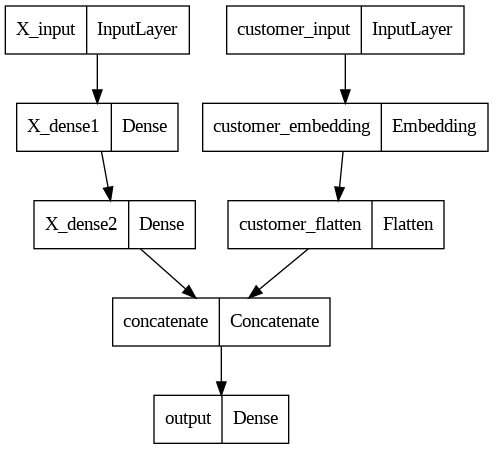

In [35]:
X_inputs = tf.keras.Input(shape=(10,), name='X_input')
customer_inputs = tf.keras.Input(shape=(1,), name='customer_input')

# X
X_dense1 = tf.keras.layers.Dense(64, activation='relu', name='X_dense1')(X_inputs)
X_dense2 = tf.keras.layers.Dense(64, activation='relu', name='X_dense2')(X_dense1)

# customers
customer_embedding = tf.keras.layers.Embedding(
    input_dim=2034516,
    output_dim=64,
    input_length=1,
    name='customer_embedding'
)(customer_inputs)
customer_flatten = tf.keras.layers.Flatten(name='customer_flatten')(customer_embedding)

# Concatenate
concat = tf.keras.layers.concatenate([X_dense2, customer_flatten], name='concatenate')

# Output
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat)


model = tf.keras.Model(inputs=[X_inputs, customer_inputs], outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

In [36]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [37]:
history = model.fit(
    [X_train, customers_train],
    y_train,
    validation_split=0.2,
    class_weight={
        0: 0.25,
        1: 4.0
    },
    batch_size=512,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
13901/13901 [==============================] - 1004s 72ms/step - loss: 0.0093 - accuracy: 0.9910 - auc: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9995 - val_auc: 0.9998
Epoch 2/10
13901/13901 [==============================] - 994s 72ms/step - loss: 7.3545e-04 - accuracy: 0.9996 - auc: 0.9998 - val_loss: 0.0020 - val_accuracy: 0.9997 - val_auc: 0.9998
Epoch 3/10
13901/13901 [==============================] - 996s 72ms/step - loss: 5.6382e-04 - accuracy: 0.9997 - auc: 0.9999 - val_loss: 0.0017 - val_accuracy: 0.9998 - val_auc: 0.9999
Epoch 4/10
13901/13901 [==============================] - 995s 72ms/step - loss: 5.2975e-04 - accuracy: 0.9998 - auc: 0.9999 - val_loss: 0.0018 - val_accuracy: 0.9998 - val_auc: 0.9999
Epoch 5/10
13901/13901 [==============================] - 996s 72ms/step - loss: 4.8250e-04 - accuracy: 0.9998 - auc: 0.9999 - val_loss: 0.0013 - val_accuracy: 0.9998 - val_auc: 0.9999
Epoch 6/10
13901/13901 [==============================] - 999s 72ms/step - los

In [36]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)

 10%|█         | 3/29 [31:34<3:41:38, 511.47s/it]